(0.0, 655.0)

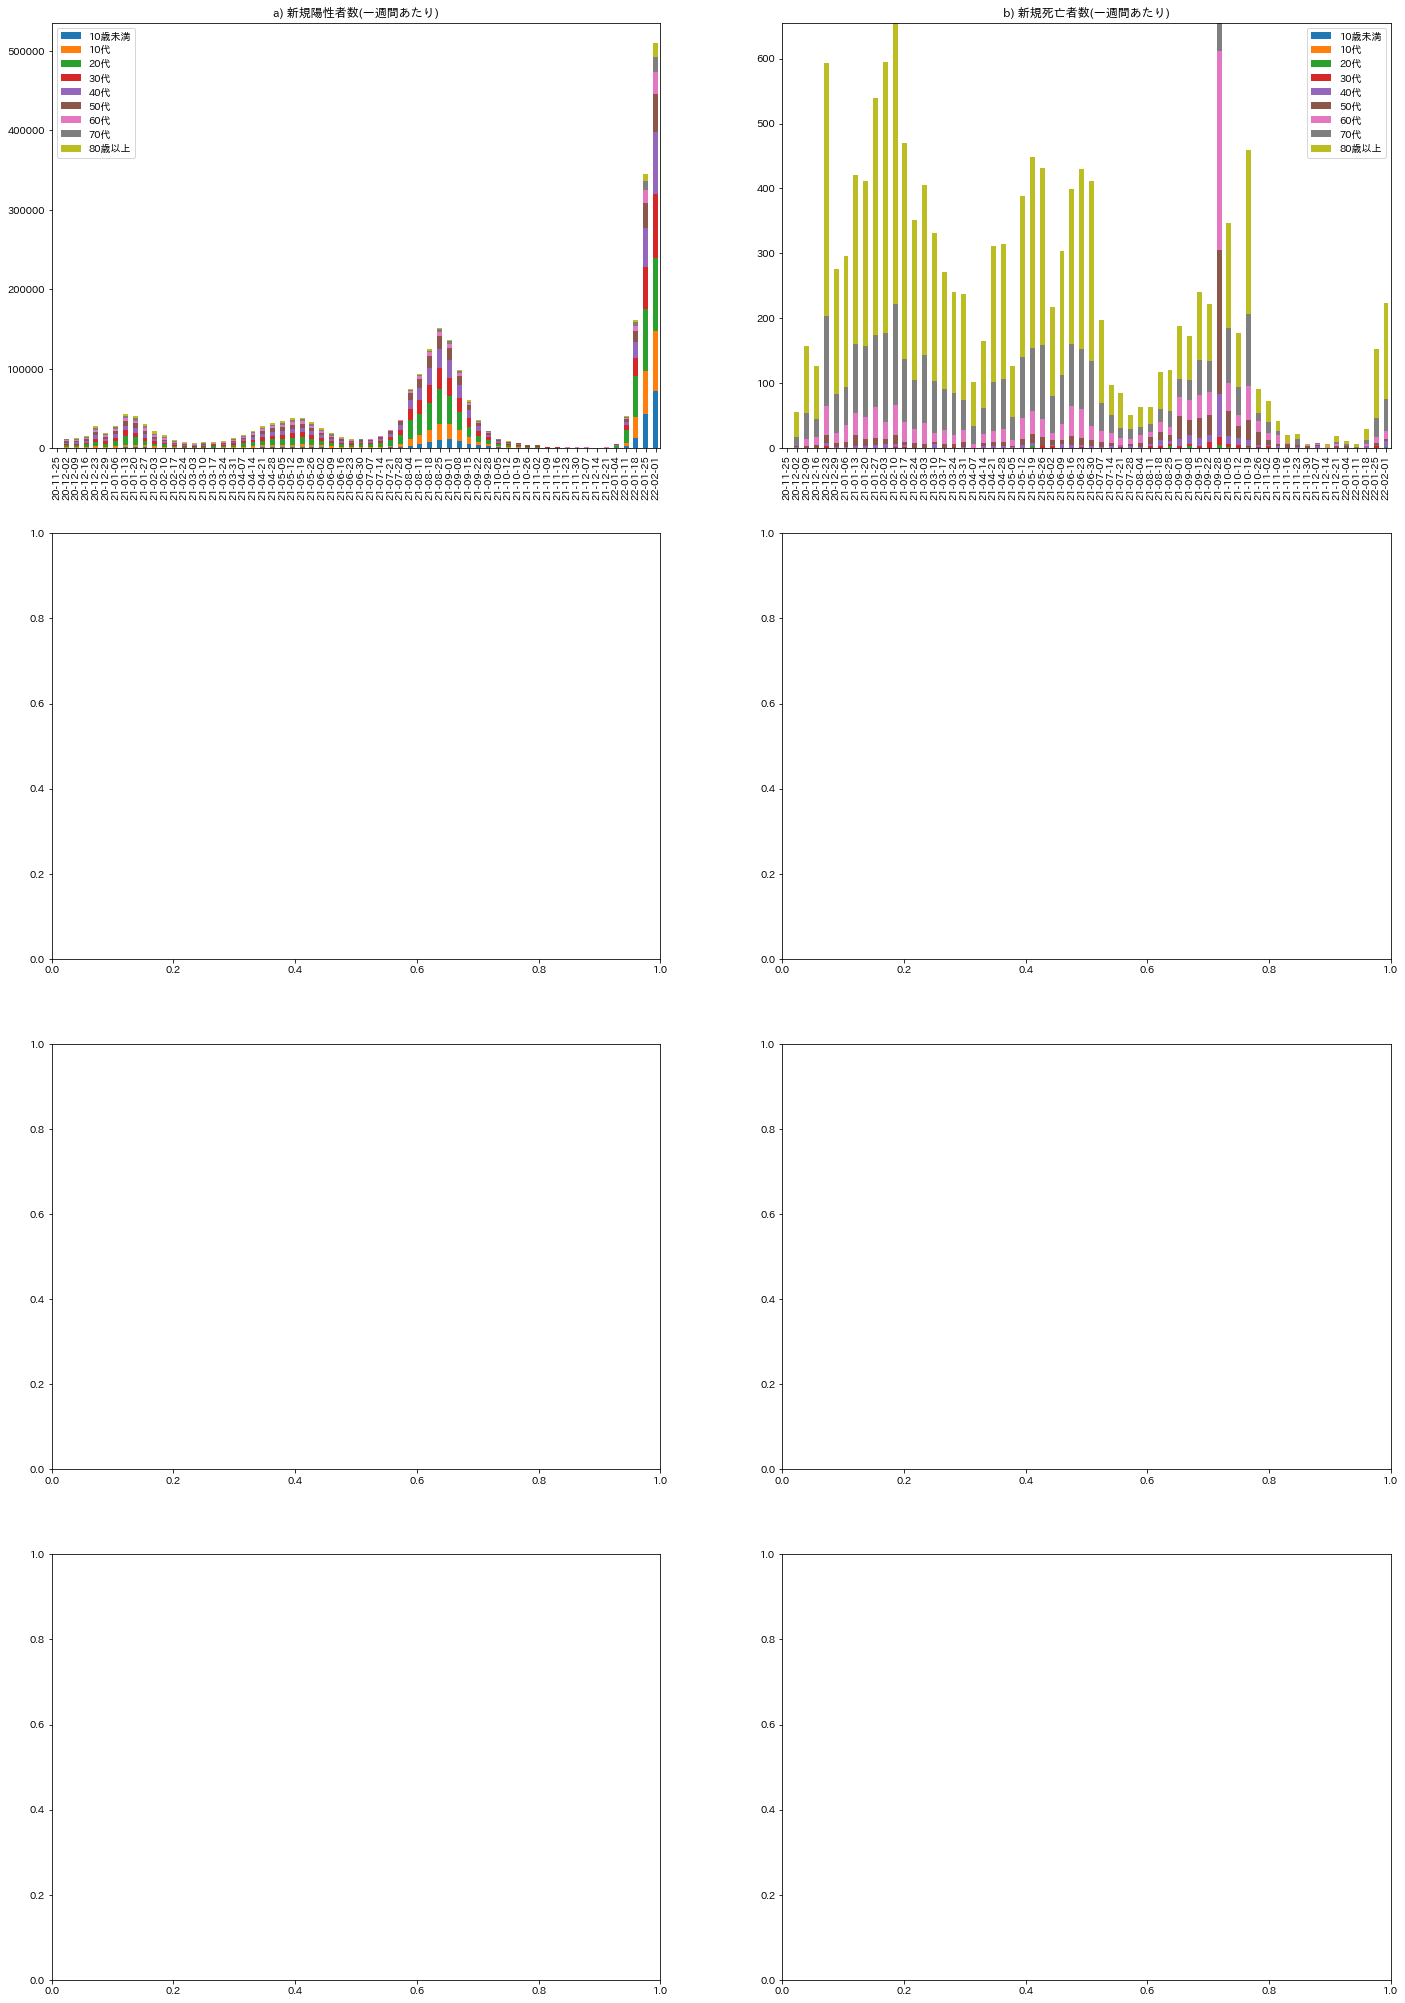

In [49]:
import numpy as np
import pandas as pd
import datetime as dt
from itertools import product
from matplotlib  import pyplot as plt
import japanize_matplotlib

path = 'data/CoVid19-Japan-weekly_patients_by_age.csv'
df = pd.read_csv(path, header=[0,1], index_col=0, parse_dates=[0])
df = df.sort_index(ascending=True)

fig, ax = plt.subplots(4,2,figsize=(12*2,9*4))
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7 = ax[0,0], ax[0,1], ax[1,0], ax[1,1], ax[2,0], ax[2,1], ax[3,0], ax[3,1]
# 1行目
df["陽性者数"].loc[:,:"80歳以上"].diff().plot(kind='bar', stacked="True",ax=ax0)
ax0.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax0.set_title("a) 新規陽性者数(一週間あたり)")
df1 = df["死亡者数"].diff()
bar1 = df1.loc[:,:"80歳以上"].plot(kind='bar', stacked="True", ax=ax1)

ax1.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax1.set_title("b) 新規死亡者数(一週間あたり)")
ylim1 = df1[df1.index!=dt.datetime(2021,9,28)]["合計"].max()
#df1[df1.index==dt.datetime(2021,9,28)]["合計"].plot(kind='bar', x=dt.datetime(2021,9,28),color='r', ax=ax1)
ax1.set_ylim((0,ylim1))

In [35]:
bar1

<AxesSubplot:title={'center':'b) 新規死亡者数(一週間あたり)'}>

In [ ]:
# 2行目
df["入院者数"].loc[:,:"不明等"].plot(kind='bar', stacked="True", ax=ax2)
ax2.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax2.set_title("c) 入院者数")
df["重症者数"].loc[:,:"不明等"].plot(kind='bar', stacked="True", ax=ax3)
ax3.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax3.set_title("d) 重症者数")
# 3行目
(df["入院者数"].loc[:,:"80歳以上"].cumsum()/df["陽性者数"].loc[:,:"80歳以上"]).plot(ax=ax4, xticks=df.index, rot=90)
ax4.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax4.set_title("e) 累積陽性者数あたりの述べ入院者数(人×週)")
ax4.set_xlim(df.index[0], df.index[-1])
(df["重症者数"].loc[:,:"80歳以上"].cumsum()/df["陽性者数"].loc[:,:"80歳以上"]).plot(ax=ax5, xticks=df.index, rot=90)
ax5.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax5.set_title("f) 累積陽性者数あたりの述べ重症者数(人×週)")
ax5.set_xlim(df.index[0], df.index[-1])
# 4行目
(df["重症者数"].loc[:,:"80歳以上"]/df["入院者数"].loc[:,:"80歳以上"]).plot(ax=ax6, xticks=df.index, rot=90)
ax6.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax6.set_title("g) 入院者数に対する重症者数の比率")
ax6.legend(loc="upper left")
ax6.grid(axis='y')
ax6.set_ylim((0,0.04))
ax6.set_xlim(df.index[0], df.index[-1])
# 5行目
(df["死亡者数"].loc[:,:"80歳以上"]/df["陽性者数"].loc[:,:"80歳以上"]).plot(ax=ax7, xticks=df.index, rot=90)
ax7.set_xticklabels(df.index.strftime("%y-%m-%d").to_list())
ax7.set_title("h) 累積陽性者あたりの累積死亡者数")
ax7.legend(loc="upper left")
ax7.grid(axis='y')
ax7.set_yscale('log')
ax7.set_xlim(df.index[0], df.index[-1])

#fig.savefig("fig/CoVid19-Japan-patients_by_age.png", bbox_inches='tight')
#print("Wrote: fig/CoVid19-Japan-patients_by_age.png")
plt.show()